In [1]:
# Basic introduction to running PCA 
# Refer 'PCA - Treasury Rates' notebook for a clearer example and usage of PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv('../../Github/python-data-science/data/cancer_tumor_data_features.csv')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 30)

<AxesSubplot:>

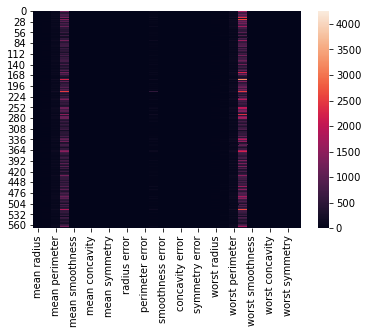

In [7]:
sns.heatmap(df)

In [8]:
scaler = StandardScaler()

In [9]:
dfs = scaler.fit_transform(df)

In [10]:
dfs.mean(axis=0).round(4)

array([-0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,
       -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,
        0.,  0.,  0., -0.])

In [11]:
df.std(axis=0)

mean radius                  3.524049
mean texture                 4.301036
mean perimeter              24.298981
mean area                  351.914129
mean smoothness              0.014064
mean compactness             0.052813
mean concavity               0.079720
mean concave points          0.038803
mean symmetry                0.027414
mean fractal dimension       0.007060
radius error                 0.277313
texture error                0.551648
perimeter error              2.021855
area error                  45.491006
smoothness error             0.003003
compactness error            0.017908
concavity error              0.030186
concave points error         0.006170
symmetry error               0.008266
fractal dimension error      0.002646
worst radius                 4.833242
worst texture                6.146258
worst perimeter             33.602542
worst area                 569.356993
worst smoothness             0.022832
worst compactness            0.157336
worst concav

In [12]:
dfs.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

---
### Manually estimating PCs

In [13]:
covmat = np.cov(dfs, rowvar=False)
eigen_value, eigen_vector = np.linalg.eig(covmat)

In [14]:
eigen_value.round(2)

array([1.33e+01, 5.70e+00, 2.82e+00, 1.98e+00, 1.65e+00, 1.21e+00,
       6.80e-01, 4.80e-01, 4.20e-01, 3.50e-01, 2.90e-01, 2.60e-01,
       2.40e-01, 1.60e-01, 9.00e-02, 8.00e-02, 6.00e-02, 5.00e-02,
       5.00e-02, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e-02, 1.00e-02,
       2.00e-02, 2.00e-02, 2.00e-02, 3.00e-02, 3.00e-02, 3.00e-02])

In [15]:
eigen_vector.shape

(30, 30)

In [16]:
# np.argsort(eigen_value)

In [17]:
# Keeping just 2 PCs
pcnum = 2
eigen_value, eigen_vector = eigen_value[:pcnum], eigen_vector[:,:pcnum]

In [18]:
# Project data to 2 PCs
pcs = np.dot(dfs, eigen_vector)
pcs

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

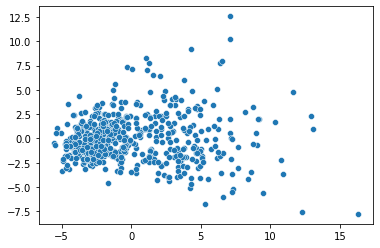

In [19]:
sns.scatterplot(x=pcs[:,0], y=pcs[:,1]);

---
### Do 2 PCs capture sufficient information to classify?

In [20]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [21]:
type(cancer_data), cancer_data.keys()

(sklearn.utils.Bunch,
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']))

In [22]:
cancer_data['data'].shape

(569, 30)

In [23]:
Y = cancer_data['target']

<AxesSubplot:>

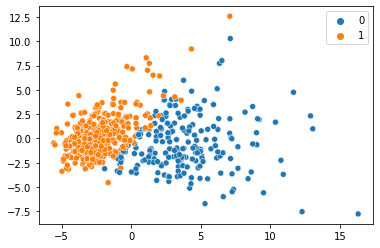

In [24]:
sns.scatterplot(x=pcs[:,0], y=pcs[:,1], hue=Y)

---
### Using Sklearn

In [25]:
from sklearn.decomposition import PCA

In [26]:
pcnum = 2
pca_mod = PCA(n_components=pcnum)

In [27]:
pcs = pca_mod.fit_transform(dfs)
pcs

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [28]:
pca_mod.components_.shape

(2, 30)

In [29]:
pca_mod.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [30]:
pca_mod.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [31]:
eigen_vector.T

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [32]:
(pca_mod.components_.round(6) == eigen_vector.T.round(6)).all()

True

In [33]:
df_comp = pd.DataFrame(pca_mod.components_, index=['PC1', 'PC2'], columns = df.columns)
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,0.205979,0.017428,0.211326,0.202870,0.014531,0.170393,0.153590,0.183417,0.042498,0.102568,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,-0.105552,0.089980,-0.089457,-0.152293,0.204430,0.232716,0.197207,0.130322,0.183848,0.280092,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


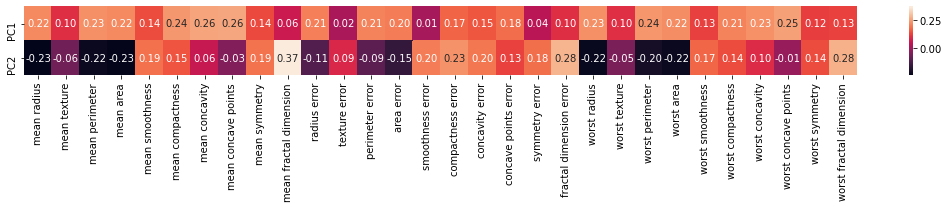

In [34]:
plt.figure(figsize=(15,3))
sns.heatmap(df_comp, annot=True, fmt ='.2f')
plt.tight_layout()

---
### Digit dataset

In [35]:
digits = pd.read_csv('../../Github/python-data-science/data/digits.csv')

In [36]:
digits.shape

(1797, 65)

In [37]:
digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [38]:
pixels = digits.drop(columns='number_label')
pixels.shape

(1797, 64)

In [39]:
print(pixels.iloc[0].values.reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


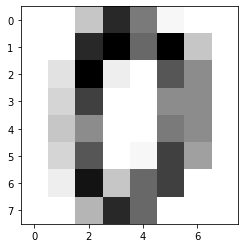

In [40]:
plt.imshow(pixels.iloc[0].values.reshape(8,8), cmap='Greys')

In [41]:
scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixels)

In [42]:
pixels_scaled.mean(axis=0).round(4), pixels_scaled.std(axis=0).round(4)

(array([ 0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
        -0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0., -0.,
         0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
         0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.]),
 array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [43]:
pca_mod = PCA(n_components=2)

In [44]:
pca_pixels = pca_mod.fit_transform(pixels_scaled)

In [45]:
pca_mod.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [46]:
(pixels.var(axis=0)/pixels.var(axis=0).sum()).sort_values(ascending=False)*100

pixel_5_2    3.555707
pixel_5_3    3.451435
pixel_4_2    3.327517
pixel_4_3    3.268544
pixel_5_4    3.259290
               ...   
pixel_3_0    0.000093
pixel_7_0    0.000046
pixel_0_0    0.000000
pixel_4_7    0.000000
pixel_4_0    0.000000
Length: 64, dtype: float64

<AxesSubplot:>

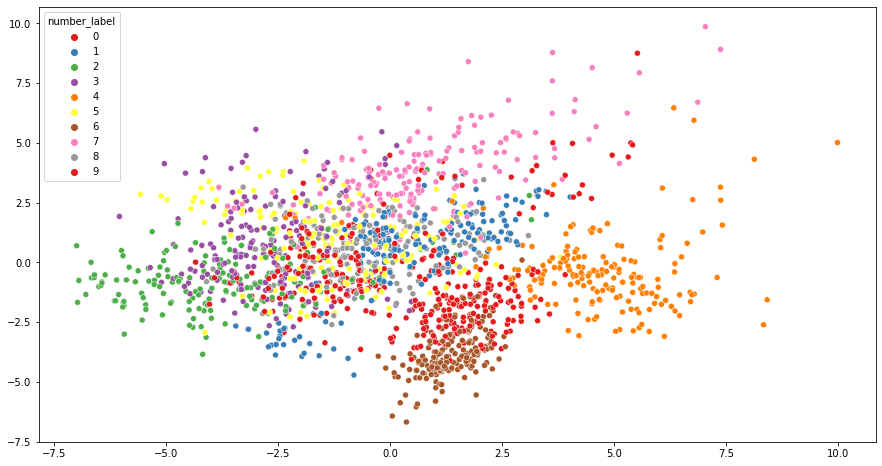

In [47]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=pca_pixels[:,0], y=pca_pixels[:,1], hue=digits['number_label'], palette='Set1')

In [48]:
pca_mod3 = PCA(n_components=3)
pca_pixels3 = pca_mod3.fit_transform(pixels_scaled)

In [49]:
from mpl_toolkits import mplot3d

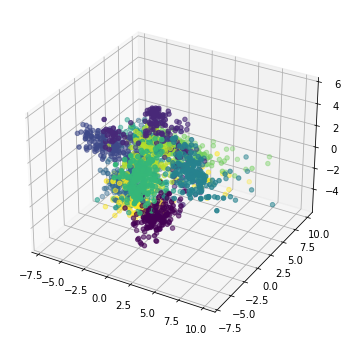

In [50]:
# %matplotlib notebook

plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels3[:,0], pca_pixels3[:,1], pca_pixels3[:,2], c=digits['number_label']);